In [28]:
%pylab inline
import matplotlib.pyplot as plt
import numpy
import h5py

file_path = "/Users/dalyabaron/Downloads/cutout_84.hdf5"
f = h5py.File(file_path, "r")
stars_snap = f['PartType4']

stars_coords = stars_snap['Coordinates'] # the coordinates in which there are stars are here
dx = stars_coords[:,0]
dy = stars_coords[:,1]
dz = stars_coords[:,2]

stars_mags = stars_snap['GFM_StellarPhotometrics'] # magnitudes are here
u_luminosity = 10 ** (stars_mags[:,4]/-2.5) # lets start with U band and then work with all the rest
##u_luminosity = 10 ** (numpy.sum(stars_mags, axis=1)/-2.5)

x_vec = numpy.linspace(numpy.percentile(dx, 10), numpy.percentile(dx,90), 50)
y_vec = numpy.linspace(numpy.percentile(dy, 10), numpy.percentile(dy,90), 50)
z_vec = numpy.linspace(numpy.percentile(dz, 10), numpy.percentile(dz,90), 50)
u_lum_mat = numpy.zeros(shape=(50, 50, 50))

for i in xrange(49):
    for j in xrange(49):
        for k in xrange(49):
            x_min = x_vec[i]
            x_max = x_vec[i+1]
            y_min = y_vec[j]
            y_max = y_vec[j+1]
            z_min = z_vec[k]
            z_max = z_vec[k+1]
            
            lums_list = u_luminosity[(dx >= x_min) & (dx <= x_max) &
                                     (dy >= y_min) & (dy <= y_max) &
                                     (dz >= z_min) & (dz <= z_max)]
            u_lum_mat[i][j][k] += numpy.sum(lums_list)
# count the number of non zero elements in the matrix now
print "number of non-zero elements: %s, out of %s elements in total" % (numpy.count_nonzero(u_lum_mat), 70**3)

Populating the interactive namespace from numpy and matplotlib
number of non-zero elements: 6230, out of 343000 elements in total


`%matplotlib` prevents importing * from pylab and numpy


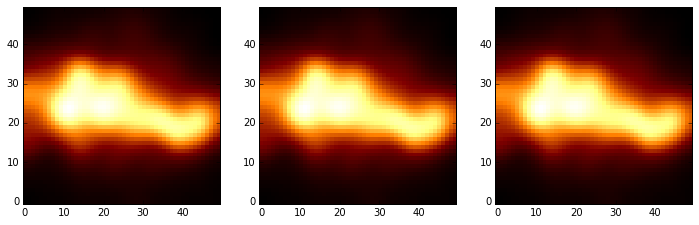

In [32]:
from scipy.ndimage.filters import gaussian_filter

# produce 3 projection on x,y, and z axes and plot them to see how it looks like
proj_1 = numpy.sum(u_lum_mat, axis=0)
proj_2 = numpy.sum(u_lum_mat, axis=1)
proj_3 = numpy.sum(u_lum_mat, axis=2)

plt.rcParams['figure.figsize'] = 12, 4
plot_kwargs = {"interpolation": "nearest",
          "cmap": "afmhot",
          "origin": "lower"}

plt.subplot(1, 3, 1)
data_sum = gaussian_filter(proj_1, 3)
plt.imshow(data_sum, **plot_kwargs)

plt.subplot(1, 3, 2)
data_sum = gaussian_filter(proj_1, 3)
plt.imshow(data_sum, **plot_kwargs)

plt.subplot(1, 3, 3)
data_sum = gaussian_filter(proj_1, 3)
plt.imshow(data_sum, **plot_kwargs)